# Neural Network – A Simple Perceptron | Assignment DS-AG-019




## Question 1
**What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.**

### Answer
Deep Learning is a subfield of machine learning that uses **artificial neural networks with many layers** ("deep" networks) to automatically learn hierarchical representations from data. Instead of manually designing features, deep learning models learn useful features directly from raw inputs like images, text, or tabular data.

#### Evolution
- **1950s–1980s:** Early neural network models such as the perceptron were proposed, but they were limited  to linearly separable problems and training deeper networks was difficult.
- **1980s–2000s:** Backpropagation was introduced, enabling multi-layer neural networks. However, lack of  large datasets and limited computational power restricted performance.
- **2006 onwards:** With the availability of **big data**, **powerful GPUs**, and better initialization and  regularization techniques, deep neural networks began to outperform traditional ML algorithms, especially  in computer vision and natural language processing.

#### Difference from Traditional Machine Learning
- **Feature Engineering**  
  - *Traditional ML:* Relies heavily on **manual feature engineering** (domain experts design features like ratios,  aggregates, handcrafted transformations). Models such as Logistic Regression, SVMs, and Random Forests are then trained on these features.
  - *Deep Learning:* Performs **automatic feature learning**. Deep networks learn low-level and high-level features directly from raw data (e.g., pixels, word indices), reducing the need for manual feature design.

- **Model Complexity**  
  - *Traditional ML:* Models are often **shallow**, with few parameters and fewer layers.
  - *Deep Learning:* Models are **deep**, with many layers and millions of parameters, capable of modeling  complex, nonlinear relationships.

- **Data Requirements**  
  - *Traditional ML:* Works reasonably well even with **smaller datasets** if features are good.
  - *Deep Learning:* Generally needs **large amounts of labeled data** to perform well.

- **Computational Requirements**  
  - *Traditional ML:* Can be trained on CPUs relatively quickly.
  - *Deep Learning:* Often requires **GPUs/TPUs** for efficient training.

Overall, deep learning is preferred when we have **large datasets**, **complex data types** (images, audio, text), and we want models that can automatically discover useful representations.

## Question 2
**Explain the basic architecture and functioning of a Perceptron. What are its limitations?**

### Answer
A **Perceptron** is the simplest form of a neural network: a single neuron used for binary classification.

#### Architecture
- **Inputs:** A vector of input features \(x = [x_1, x_2, ..., x_n]\).
- **Weights:** Each input has an associated weight \(w_i\).
- **Bias:** A bias term \(b\) that shifts the decision boundary.
- **Linear Combination:** The neuron computes a weighted sum:  
  \[ z = \sum_{i=1}^n w_i x_i + b \]
- **Activation Function:** A simple step function (hard threshold):  
  \[ \hat{y} = \begin{cases} 1 & \text{if } z \ge 0 \\ 0 & \text{otherwise} \end{cases} \]

#### Functioning / Learning Rule
1. Initialize weights and bias (e.g., small random values).
2. For each training sample, compute the prediction using the current weights.
3. Compute the error: \( \text{error} = y_{true} - y_{pred} \).
4. Update weights and bias using a learning rate \(\eta\):  
   - \( w_i \leftarrow w_i + \eta \cdot \text{error} \cdot x_i \)  
   - \( b \leftarrow b + \eta \cdot \text{error} \)
5. Repeat until convergence (or maximum epochs).

#### Limitations
- **Only linearly separable problems:** A single-layer perceptron can only learn problems where classes can be  separated by a straight line (in 2D), plane (in 3D), or hyperplane (in higher dimensions). It **cannot solve**  problems like XOR which are not linearly separable.
- **No hidden layers:** Lacks the ability to learn complex, hierarchical patterns.
- **Hard output:** Step activation does not provide probabilities and is not differentiable, making it unsuitable for gradient-based optimization in deeper networks.
- **Sensitive to learning rate and data scaling.**

## Question 3
**Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.**

### Answer
#### Purpose of Activation Function
Activation functions introduce **non-linearity** into the neural network. Without them, a neural network made of linear layers would still be equivalent to a single linear transformation and could not model complex, nonlinear relationships. Activation functions allow networks to learn complex decision boundaries and feature representations.

#### Sigmoid
- Formula: \( \sigma(x) = \frac{1}{1 + e^{-x}} \)
- Output range: (0, 1)
- Advantages:
  - Interpretable as probability; commonly used in the output layer for **binary classification**.
- Disadvantages:
  - **Vanishing gradient** for large positive or negative inputs (gradient becomes very small).
  - Outputs are not zero-centered (always positive), which can slow down learning.

#### ReLU (Rectified Linear Unit)
- Formula: \( \text{ReLU}(x) = \max(0, x) \)
- Output range: [0, \(\infty\))
- Advantages:
  - Simple and efficient to compute.
  - Reduces vanishing gradient problem for positive inputs, enabling deeper networks.
- Disadvantages:
  - Can cause **dead neurons** (weights never update if neuron outputs 0 for all inputs).

#### Tanh (Hyperbolic Tangent)
- Formula: \( \tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} \)
- Output range: (-1, 1)
- Advantages:
  - Zero-centered outputs; often works better than sigmoid for hidden layers.
- Disadvantages:
  - Still suffers from **vanishing gradients** for large |x|.

#### Summary
- **Sigmoid:** Best for binary output layer.
- **ReLU:** Most common for hidden layers in deep networks.
- **Tanh:** Sometimes used in hidden layers when zero-centered outputs are useful, but less common than ReLU now.

## Question 4
**What is the difference between Loss function and Cost function in neural networks? Provide examples.**

### Answer
- A **Loss function** measures the error for **a single training example** (or sometimes for a single batch).
- A **Cost function** is typically the **aggregate (e.g., mean or sum) of the loss values over the entire training set**.

In practice, the terms are often used interchangeably, but conceptually:
- **Loss:** \( L(\hat{y}^{(i)}, y^{(i)}) \) for sample \(i\).
- **Cost:** \( J(\theta) = \frac{1}{m} \sum_{i=1}^m L(\hat{y}^{(i)}, y^{(i)}) \), where \(m\) is number of samples.

#### Examples
- **Mean Squared Error (MSE)** for regression:
  - Loss for one sample: \( L = (\hat{y} - y)^2 \)
  - Cost over dataset: \( J = \frac{1}{m} \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2 \)

- **Binary Cross-Entropy** for binary classification:
  - Loss for one sample:  
    \[ L = -\big( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \big) \]
  - Cost over dataset: \( J = \frac{1}{m} \sum_{i=1}^m L^{(i)} \).

So, loss is the **error per example**, while cost is the **overall objective** we minimize during training.

## Question 5
**What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop.**

### Answer
An **optimizer** is an algorithm used to update the **weights and biases** of a neural network to minimize the cost function. It decides *how* the parameters move in the direction that reduces the loss.

#### Gradient Descent (Batch / Mini-batch / Stochastic)
- Uses the gradient of the cost function w.r.t parameters.
- **Batch Gradient Descent:** Uses all training data to compute gradients each step. Stable but can be slow.
- **Stochastic Gradient Descent (SGD):** Uses one sample at a time; noisy but can escape local minima.
- **Mini-batch Gradient Descent:** Uses a small batch of samples; practical and widely used.
- Learning rate is constant (unless manually scheduled).

#### RMSprop (Root Mean Square Propagation)
- Keeps a running average of the **squared gradients** for each parameter.
- Scales the learning rate for each parameter by the inverse of the root mean square of recent gradients.
- Handles **non-stationary** objectives well and works nicely for RNNs.
- Helps deal with **different gradient scales** across parameters.

#### Adam (Adaptive Moment Estimation)
- Combines ideas from **Momentum** and **RMSprop**.
- Maintains running averages of both:
  - First moment (mean of gradients).
  - Second moment (uncentered variance of gradients).
- Performs bias correction to improve estimates early in training.
- Often converges faster and works well **out of the box** for many problems.

#### Summary
- **Gradient Descent / SGD:** Simple and foundational; may require careful tuning of learning rate.
- **RMSprop:** Adapts learning rate per parameter based on squared gradients; good for noisy problems.
- **Adam:** Most popular default choice; adaptive learning rates + momentum usually lead to faster convergence.

## Question 6
**Write a Python program to implement a single-layer perceptron from scratch using NumPy to solve the logical AND gate.**

The AND gate has the following truth table:

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 0 |
| 0  | 1  | 0 |
| 1  | 0  | 0 |
| 1  | 1  | 1 |

We will train a perceptron so that it learns this mapping.

In [1]:
import numpy as np

# Training data for AND gate
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 0, 0, 1])  # AND outputs

# Perceptron parameters
np.random.seed(42)
weights = np.random.randn(2)  # two inputs
bias = 0.0
learning_rate = 0.1
epochs = 20

def step_function(z):
    return np.where(z >= 0, 1, 0)

# Training loop
for epoch in range(epochs):
    total_error = 0
    for xi, target in zip(X, y):
        z = np.dot(xi, weights) + bias
        y_pred = step_function(z)
        error = target - y_pred
        # Update rule
        weights += learning_rate * error * xi
        bias += learning_rate * error
        total_error += abs(error)
    print(f"Epoch {epoch+1}: Total error = {total_error}")

print("\nFinal weights:", weights)
print("Final bias:", bias)

# Testing the trained perceptron
print("\nTesting AND gate:")
for xi in X:
    z = np.dot(xi, weights) + bias
    y_pred = step_function(z)
    print(f"Input: {xi}, Predicted: {y_pred}")

Epoch 1: Total error = 2
Epoch 2: Total error = 2
Epoch 3: Total error = 2
Epoch 4: Total error = 1
Epoch 5: Total error = 0
Epoch 6: Total error = 0
Epoch 7: Total error = 0
Epoch 8: Total error = 0
Epoch 9: Total error = 0
Epoch 10: Total error = 0
Epoch 11: Total error = 0
Epoch 12: Total error = 0
Epoch 13: Total error = 0
Epoch 14: Total error = 0
Epoch 15: Total error = 0
Epoch 16: Total error = 0
Epoch 17: Total error = 0
Epoch 18: Total error = 0
Epoch 19: Total error = 0
Epoch 20: Total error = 0

Final weights: [0.29671415 0.0617357 ]
Final bias: -0.30000000000000004

Testing AND gate:
Input: [0 0], Predicted: 0
Input: [0 1], Predicted: 0
Input: [1 0], Predicted: 0
Input: [1 1], Predicted: 1


## Question 7
**Implement and visualize Sigmoid, ReLU, and Tanh activation functions using Matplotlib.**

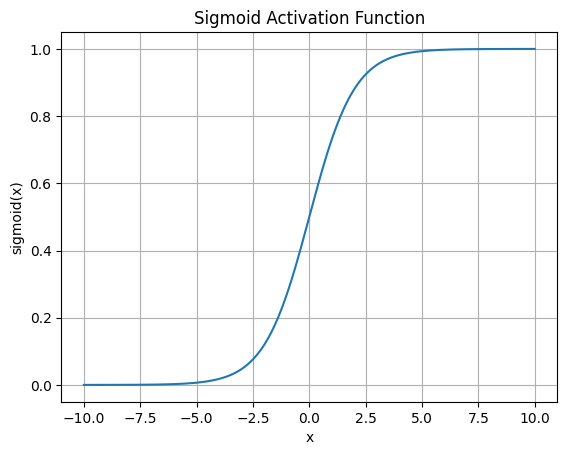

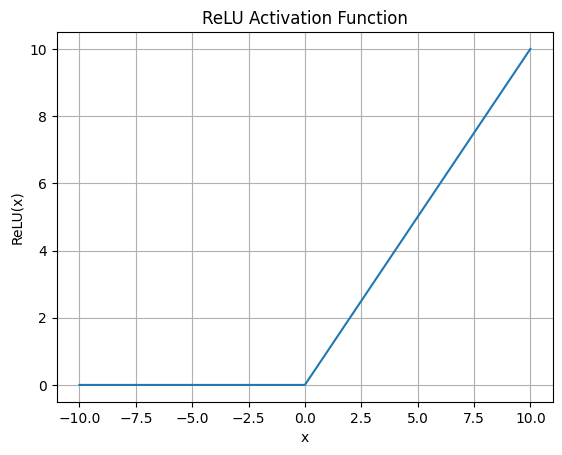

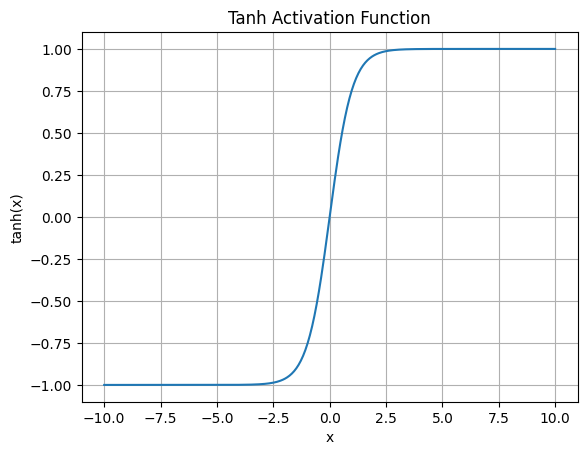

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Input range
x = np.linspace(-10, 10, 400)

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Compute outputs
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)

# Plot Sigmoid
plt.figure()
plt.plot(x, y_sigmoid)
plt.title("Sigmoid Activation Function")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.grid(True)
plt.show()

# Plot ReLU
plt.figure()
plt.plot(x, y_relu)
plt.title("ReLU Activation Function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.grid(True)
plt.show()

# Plot Tanh
plt.figure()
plt.plot(x, y_tanh)
plt.title("Tanh Activation Function")
plt.xlabel("x")
plt.ylabel("tanh(x)")
plt.grid(True)
plt.show()

## Question 8
**Use Keras to build and train a simple multilayer neural network on the MNIST digits dataset. Print the training accuracy.**

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalize pixel values
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten images (28x28 -> 784)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Build a simple neural network
model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

# Print final training accuracy
final_train_acc = history.history["accuracy"][-1]
print("Final training accuracy:", final_train_acc)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8997 - loss: 0.3628 - val_accuracy: 0.9562 - val_loss: 0.1556
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9578 - loss: 0.1449 - val_accuracy: 0.9703 - val_loss: 0.1101
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9695 - loss: 0.1026 - val_accuracy: 0.9733 - val_loss: 0.0915
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9764 - loss: 0.0762 - val_accuracy: 0.9767 - val_loss: 0.0825
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9815 - loss: 0.0598 - val_accuracy: 0.9765 - val_loss: 0.0827
Final training accuracy: 0.9814814925193787


## Question 9
**Visualize the loss and accuracy curves for a neural network model trained on the Fashion MNIST dataset. Interpret the training behavior.**

Below we train a simple multilayer neural network on the Fashion MNIST dataset using Keras and then plot the training/validation loss and accuracy curves.

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8164 - loss: 0.5259 - val_accuracy: 0.8488 - val_loss: 0.4029
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8653 - loss: 0.3732 - val_accuracy: 0.8633 - val_loss: 0.3796
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8796 - loss: 0.3336 - val_accuracy: 0.8750 - val_loss: 0.3368
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8856 - loss: 0.3105 - val_accuracy: 0.8792 - val_loss: 0.3440
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8932 - loss: 0.2886 - val_accuracy: 0.8803 - val_loss: 0.3314
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8976 - loss: 0.2774 - val_accuracy: 0.8715 - val_loss: 0.3516
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9032 - loss: 0.2612 - val_accuracy: 0.8827 - val_loss: 0.3293
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9063 - loss: 0.2508 - val_accuracy: 0.

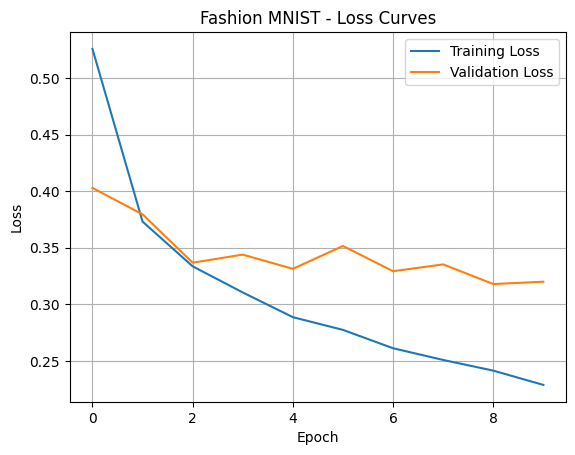

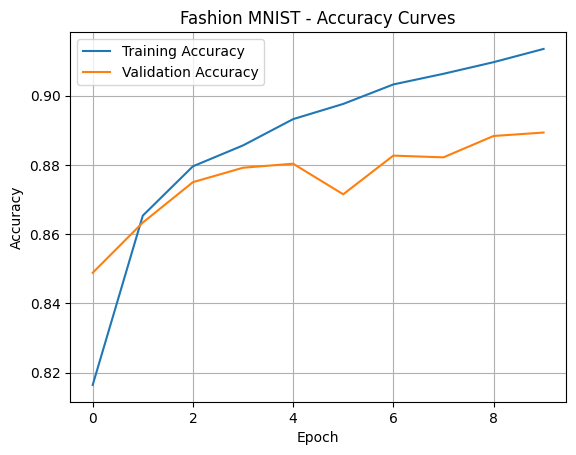

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(fx_train, fy_train), (fx_test, fy_test) = datasets.fashion_mnist.load_data()

# Normalize and reshape
fx_train = fx_train.astype("float32") / 255.0
fx_test = fx_test.astype("float32") / 255.0

fx_train = fx_train.reshape(-1, 28 * 28)
fx_test = fx_test.reshape(-1, 28 * 28)

# Build model
fashion_model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

fashion_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Train the model
fashion_history = fashion_model.fit(
    fx_train, fy_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

# Plot loss curves
plt.figure()
plt.plot(fashion_history.history["loss"], label="Training Loss")
plt.plot(fashion_history.history["val_loss"], label="Validation Loss")
plt.title("Fashion MNIST - Loss Curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy curves
plt.figure()
plt.plot(fashion_history.history["accuracy"], label="Training Accuracy")
plt.plot(fashion_history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Fashion MNIST - Accuracy Curves")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

### Interpretation of Training Behavior
- If **training loss decreases** and **validation loss also decreases or plateaus**, the model is learning well and generalizing to unseen data.
- If training accuracy continues to increase but validation accuracy stops improving or decreases while validation loss increases, it indicates **overfitting**.
- Smooth and gradually improving curves usually show a stable training process, while highly noisy curves may suggest that the learning rate is too high or the batch size is too small.
- For Fashion MNIST, a simple dense network like this typically reaches reasonable accuracy (e.g., 85–90%+) after a  few epochs if everything is set up correctly.

## Question 10
**Fraudulent Transaction Detection – Real-time Deep Learning Workflow**

You are working on a project for a bank to detect fraudulent transactions. The dataset is large, imbalanced, and contains structured features (transaction amount, merchant ID, customer location, etc.). The goal is to classify each transaction as **fraudulent** or **legitimate**.

Below is a proposed workflow and a sample deep learning model implementation.

### (a) Model Design (Perceptron or Multilayer Neural Network)
- Use a **multilayer feed-forward neural network (MLP)** because the data is structured/tabular.
- Architecture example:
  - Input layer: one neuron per feature (after preprocessing/encoding).
  - Hidden layers: 2–4 dense layers with ReLU activation (e.g., 64–256 units each).
  - Output layer: 1 neuron with Sigmoid activation for binary classification (fraud / not fraud).

### (b) Activation and Loss Functions
- **Hidden layers:** ReLU, because it is efficient and works well for deep networks.
- **Output layer:** Sigmoid, producing values between 0 and 1 interpreted as fraud probability.
- **Loss function:** Binary Cross-Entropy (`binary_crossentropy`) is appropriate for binary classification.

### (c) Training and Evaluation with Class Imbalance
- The dataset is imbalanced (few frauds vs many legitimate transactions). To handle this:
  - Use **class weights** to give more importance to the minority class during training.
  - Optionally perform **resampling** (oversample minority class or undersample majority class).
  - Use evaluation metrics beyond accuracy: **Precision, Recall, F1-score, AUC-ROC**.
- Use **train/validation/test** splits and consider using **cross-validation** if dataset size permits.

### (d) Optimizer and Overfitting Prevention
- **Optimizer:** Adam is a good default choice for tabular deep learning tasks due to its adaptive learning rate.
- To prevent **overfitting**:
  - Use **Dropout** layers in the network.
  - Use **L2 regularization** on weights.
  - Apply **EarlyStopping** based on validation loss.
  - Ensure good feature normalization and remove noisy or highly correlated features.

Below is example code that **generates a synthetic transactions dataset inside the notebook**, so you don't need any external CSV file. The dataset is imbalanced with only a small percentage of fraudulent transactions.

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

# 1. Generate a synthetic imbalanced transactions dataset
np.random.seed(42)
n_samples = 5000

data = pd.DataFrame({
    "transaction_amount": np.random.uniform(1, 5000, n_samples).round(2),
    "merchant_id": np.random.choice(["M1", "M2", "M3", "M4", "M5"], n_samples),
    "customer_location": np.random.choice(["Delhi", "Mumbai", "Bangalore", "Chennai", "Hyderabad"], n_samples),
    "device_type": np.random.choice(["Mobile", "Desktop", "Tablet"], n_samples),
    "time_of_day": np.random.choice(["Morning", "Afternoon", "Evening", "Night"], n_samples),
    "is_international": np.random.choice([0, 1], n_samples, p=[0.9, 0.1])
})

# Create an imbalanced fraud label (around 3% fraud)
base_probs = 0.03 + 0.0001 * data["transaction_amount"]
base_probs += 0.05 * data["is_international"]
fraud_probs = np.clip(base_probs, 0, 0.8)
data["is_fraud"] = np.random.binomial(1, fraud_probs)

print("Class distribution (is_fraud):")
print(data["is_fraud"].value_counts(normalize=True))

# 2. Prepare features and target
target_col = "is_fraud"
y = data[target_col].values
X = data.drop(columns=[target_col])

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Compute class weights for imbalance
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = {cls: weight for cls, weight in zip(classes, class_weights)}
print("Class weights:", class_weight_dict)

input_dim = X_train_scaled.shape[1]

# 6. Build the neural network model
fraud_model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")
])

fraud_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc")
    ]
)

# 7. Early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

# 8. Train the model
history = fraud_model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=256,
    validation_split=0.2,
    class_weight=class_weight_dict,
    callbacks=[early_stop],
    verbose=1
)

# 9. Evaluate on test set
test_results = fraud_model.evaluate(X_test_scaled, y_test, verbose=0)
print("\nTest results:")
for name, value in zip(fraud_model.metrics_names, test_results):
    print(f"{name}: {value:.4f}")

Class distribution (is_fraud):
is_fraud
0    0.7074
1    0.2926
Name: proportion, dtype: float64
Class weights: {np.int32(0): np.float64(0.7067137809187279), np.int32(1): np.float64(1.7094017094017093)}
Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.5728 - auc: 0.5645 - loss: 0.6969 - precision: 0.3476 - recall: 0.5042 - val_accuracy: 0.5738 - val_auc: 0.6749 - val_loss: 0.6761 - val_precision: 0.3669 - val_recall: 0.7387
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5844 - auc: 0.6569 - loss: 0.6578 - precision: 0.3879 - recall: 0.6973 - val_accuracy: 0.6175 - val_auc: 0.6858 - val_loss: 0.6495 - val_precision: 0.3906 - val_recall: 0.6757
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6366 - auc: 0.6909 - loss: 0.6418 - precision: 0.4282 - recall: 0.6762 - val_accuracy: 0.6263 - val_auc: 0.6850 - val_loss: 0.6404 - val_precision: 0.3951 - val_recall: 0.6532
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6338 - au